# Housing Price Prediction - Multiple Linear Regression

First, let's make sure the data is clean and ready to train the model.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Having a look at the Dataframe
df = pd.read_csv('ames.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#Inspecting Dataframe for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Correlation among features

In [4]:
pd.set_option('display.max_columns', 38)
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

## Feature Engineering

Selecting the best features to train our model. This is done by checking the features with a high or good correlation with the targeted variable.

Our target variable is SalePrice.

In [5]:
new_df = df[['YearBuilt', 'TotRmsAbvGrd', 'OverallQual', 'GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']]
new_df

,YearBuilt,TotRmsAbvGrd,OverallQual,GarageArea,GrLivArea,OverallCond,SalePrice
0,2003,8,7,548,1710,5,208500
1,1976,6,6,460,1262,8,181500
2,2001,6,7,608,1786,5,223500
3,1915,7,7,642,1717,5,140000
4,2000,9,8,836,2198,5,250000
...,...,...,...,...,...,...,...
1455,1999,7,6,460,1647,5,175000
1456,1978,7,6,500,2073,6,210000
1457,1941,9,7,252,2340,9,266500
1458,1950,5,5,240,1078,6,142125


### Inspecting the new Data

In [6]:
print("Sum of Null values\n")
print(new_df.isna().sum())
print("\n")

print("Info on Dataset\n")
print(new_df.info())
print("\n")

print(f"Sum of Duplicates: {new_df.duplicated().sum()}")

Sum of Null values

YearBuilt       0
TotRmsAbvGrd    0
OverallQual     0
GarageArea      0
GrLivArea       0
OverallCond     0
SalePrice       0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   TotRmsAbvGrd  1460 non-null   int64
 2   OverallQual   1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   GrLivArea     1460 non-null   int64
 5   OverallCond   1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB
None


Sum of Duplicates: 0


Great. There are no missing values or inaccurate column formats so we can go ahead and train our model.

### Exploring Correlation of our new features

We'll use ScatterPlots to see if our new features have a good correlation with our target variable.

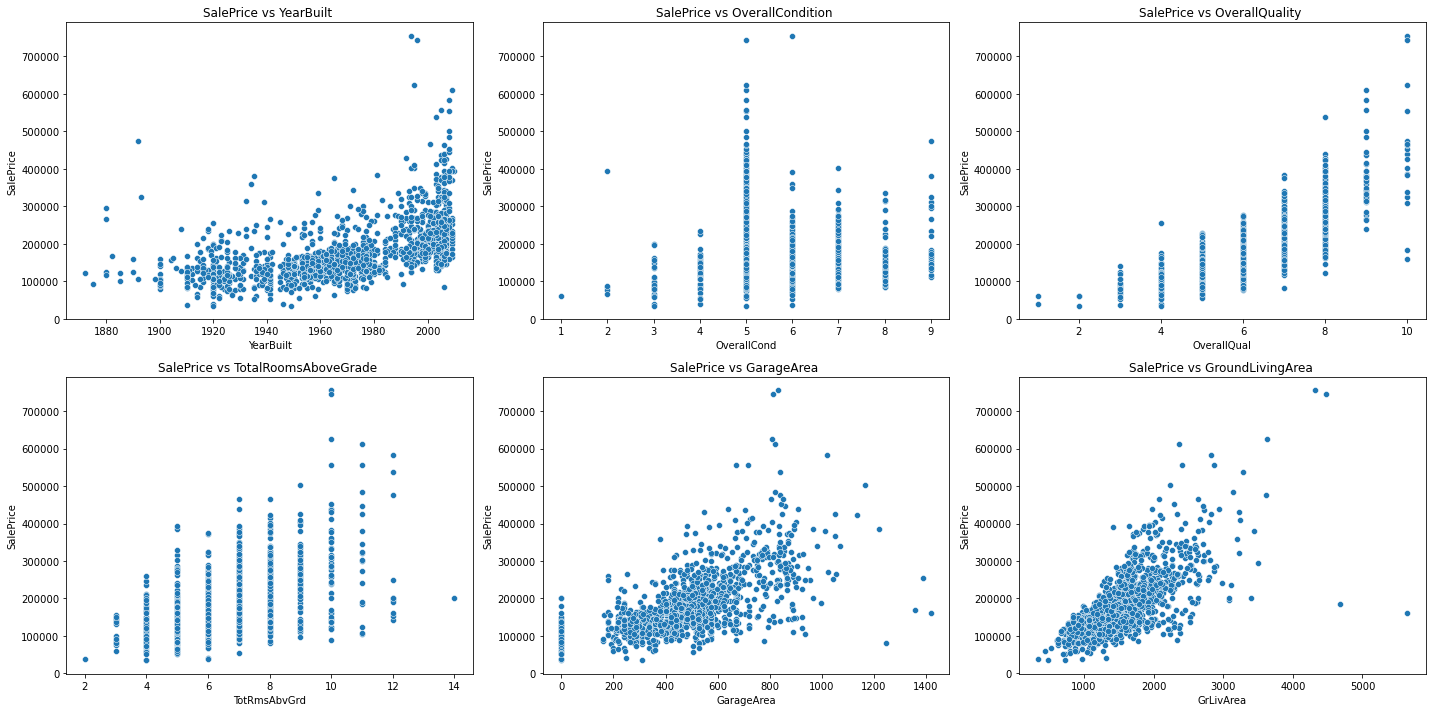

In [7]:
#Creating the plot
fig, axes = plt.subplots(2,3, figsize=(20,10))
fig.set_tight_layout(True)

sns.scatterplot(x='YearBuilt', y='SalePrice', data=new_df, ax=axes[0,0])
axes[0,0].set_title('SalePrice vs YearBuilt ')
sns.scatterplot(x='OverallCond', y='SalePrice', data=new_df, ax=axes[0,1])
axes[0,1].set_title('SalePrice vs OverallCondition ')
sns.scatterplot(x='OverallQual', y='SalePrice', data=new_df, ax=axes[0,2])
axes[0,2].set_title('SalePrice vs OverallQuality ')
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=new_df, ax=axes[1,0])
axes[1,0].set_title('SalePrice vs TotalRoomsAboveGrade ')
sns.scatterplot(x='GarageArea', y='SalePrice', data=new_df, ax=axes[1,1])
axes[1,1].set_title('SalePrice vs GarageArea ')
sns.scatterplot(x='GrLivArea', y='SalePrice', data=new_df, ax=axes[1,2])
axes[1,2].set_title('SalePrice vs GroundLivingArea ');

Great. From the ScatterPlots we can see our features have a relationship with the target variable.

For example, ScatterPlot 3 shows us that when `Overall Quality` **increases**, the `Sale Price` also **increases**.

Let's explore this using a heatmap below.

Text(0.5, 1.0, 'Correlation of the new features and Sale Price')

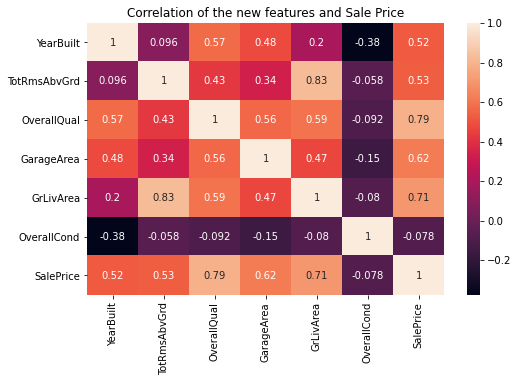

In [8]:
matrix = new_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(matrix, annot=True)
plt.title("Correlation of the new features and Sale Price")

## Machine Learning

Importing necessary libraries

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import Math2

Input and output data

In [10]:
input_data = new_df[['YearBuilt', 'TotRmsAbvGrd', 'OverallQual', 'GarageArea', 'GrLivArea']].values
output_data = np.asarray(new_df['SalePrice'])

Splitting Data for Training and Testing

In [11]:
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

Training and Testing the Model

In [12]:
LR = linear_model.LinearRegression()
LR.fit(in_train, out_train)
predictions = LR.predict(in_test)

abs_error = mean_absolute_error(out_test, predictions)
sq_error = mean_squared_error(out_test, predictions)
Linearvar = explained_variance_score(out_test, predictions)
rms = Math2.sqrt(sq_error)
r2 = r2_score(out_test, predictions)

print("Mean Absolute Error:",abs_error)
print("Mean Squared Error:",sq_error)
print("Variance score:",Linearvar)
print("Root Mean Squared Error:",rms)
print("R2 Score:",r2)

Mean Absolute Error: 26867.362770388885
Mean Squared Error: 1763648713.148219
Variance score: 0.7715617432335885
Root Mean Squared Error: 41995.817805446044
R2 Score: 0.77006861696499
